*******
<div style="padding:20px;color:black;margin:0;font-size:200%;text-align:center;display:fill;border-radius:5px;background-color:#bdd6f5;overflow:hidden;font-weight:500">Projet 3.1  : application au service de la santé publique</div>  

*******

### Tables des matières<a class="anchor" id="retour"></a> 

* [Présentation du projet](#Présentation)


* [Partie 1 🛠 Nettoyage des donnéés](#Partie_1)


* [1. Représentation graphique des valeurs nulles](#Par_1)
* [2. ⌛️Variables temporelles](#Par_2)
* [3. Suppression des colonnes identiques](#Par_3)
* [4. Gestion des outliers (IQR & Filtres)](#Par_4)
  * [4.1 Variable Energy_100g](#Section_4.1)      
  * [4.2 les autres variables pour 100g](#Section_4.2) 
  * [4.3 Traitement des variables product_name et nutri_score ](#Section_4.3)
  * [4.4 Suppression des variables qualitatives inutiles](#Section_4.4)
* [5. Données manquantes & imputations ](#Par_5)
  * [5.1 Imputation par la méthode de la médian](#Section_5.1)      
  * [5.2 Imputation par la méthode du plus proche voisin KNN ](#Section_5.2) 
  
  
* [Conclusion Partie 1](#conclusion)

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500"> Présentation du projet</div>   
<a class="anchor" id="Présentation"></a> 

****

>L'agence **"Santé publique France"** a lancé un appel à projets pour trouver des **idées innovantes d’applications en lien avec l'alimentation**.
>

> Avant de présenter notre application, il s'agit d'effectuer un travail nécessaire sur les données. La faisabilité de    l'applicaton repose sur la qualité de la base de données et la compréhension des données.    

>Le travail sur les données est regoupé en deux parties:     
>1. Le nettoyage des données, le but étant de reccupérer un set exploitable          
>2. L'analyse exploratoire, permettant de comprendre la structure des données      

>L'application sera présentée succintement dans la conclusion de la partie 2.

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">Partie 1 🛠 Nettoyage des données</div>   
<a class="anchor" id="Partie_1"></a> 

****

## 🧮Présentation des données <a class="anchor" id="Section_1.1"></a> 

In [1]:
# Importation des librairies nécessaires

# Librairie traitements et graphiques
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# permet de gérer les variables et calculs temporels
import datetime

# Permet de travailler sur des données centrées et réduites
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# Permet de réaliseer l'ACP
from sklearn import decomposition
from sklearn.decomposition import PCA

In [2]:
# Téléchargement de la base de données
df = pd.read_csv("data.csv",sep="	")
df  

C:\Users\fbbou\AppData\Local\Temp\ipykernel_2368\2046294393.py:2: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data.csv",sep="	")


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


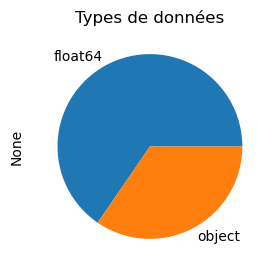

In [3]:
# Répartition des données par types

plt.figure(figsize=(6,3))
df.dtypes.value_counts().plot.pie()
plt.title("Types de données")
plt.show()

In [4]:
#Création d'un csv, construit à partir de la variable "où sont distribués les produits"
#on ne reccupère que les valeurs unique

df[["countries"]].to_csv("list_pays_vente.csv")
pd.DataFrame(df["countries"].unique()).to_csv("list_pays_vente.csv")

In [5]:
# Création d'un DF sans la france
df_autre = df[~(df["countries"].str.contains("en:france|France|Fr|FR|França|Francia|france|Frankreich",
                                            regex=True)==True)]                                     

In [6]:
# Nous conservons uniquement les articles vendu en France

df = df[df["countries"].str.contains("en:france|France|Fr|FR|França|Francia|france|Frankreich",
                                     regex=True)==True]

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">1. Représentation graphique des valeurs nulles</div>   
<a class="anchor" id="Présentation"></a> 

****

> Les cellules vides sont en blanc et celles pleines sont en bleu

<AxesSubplot:>

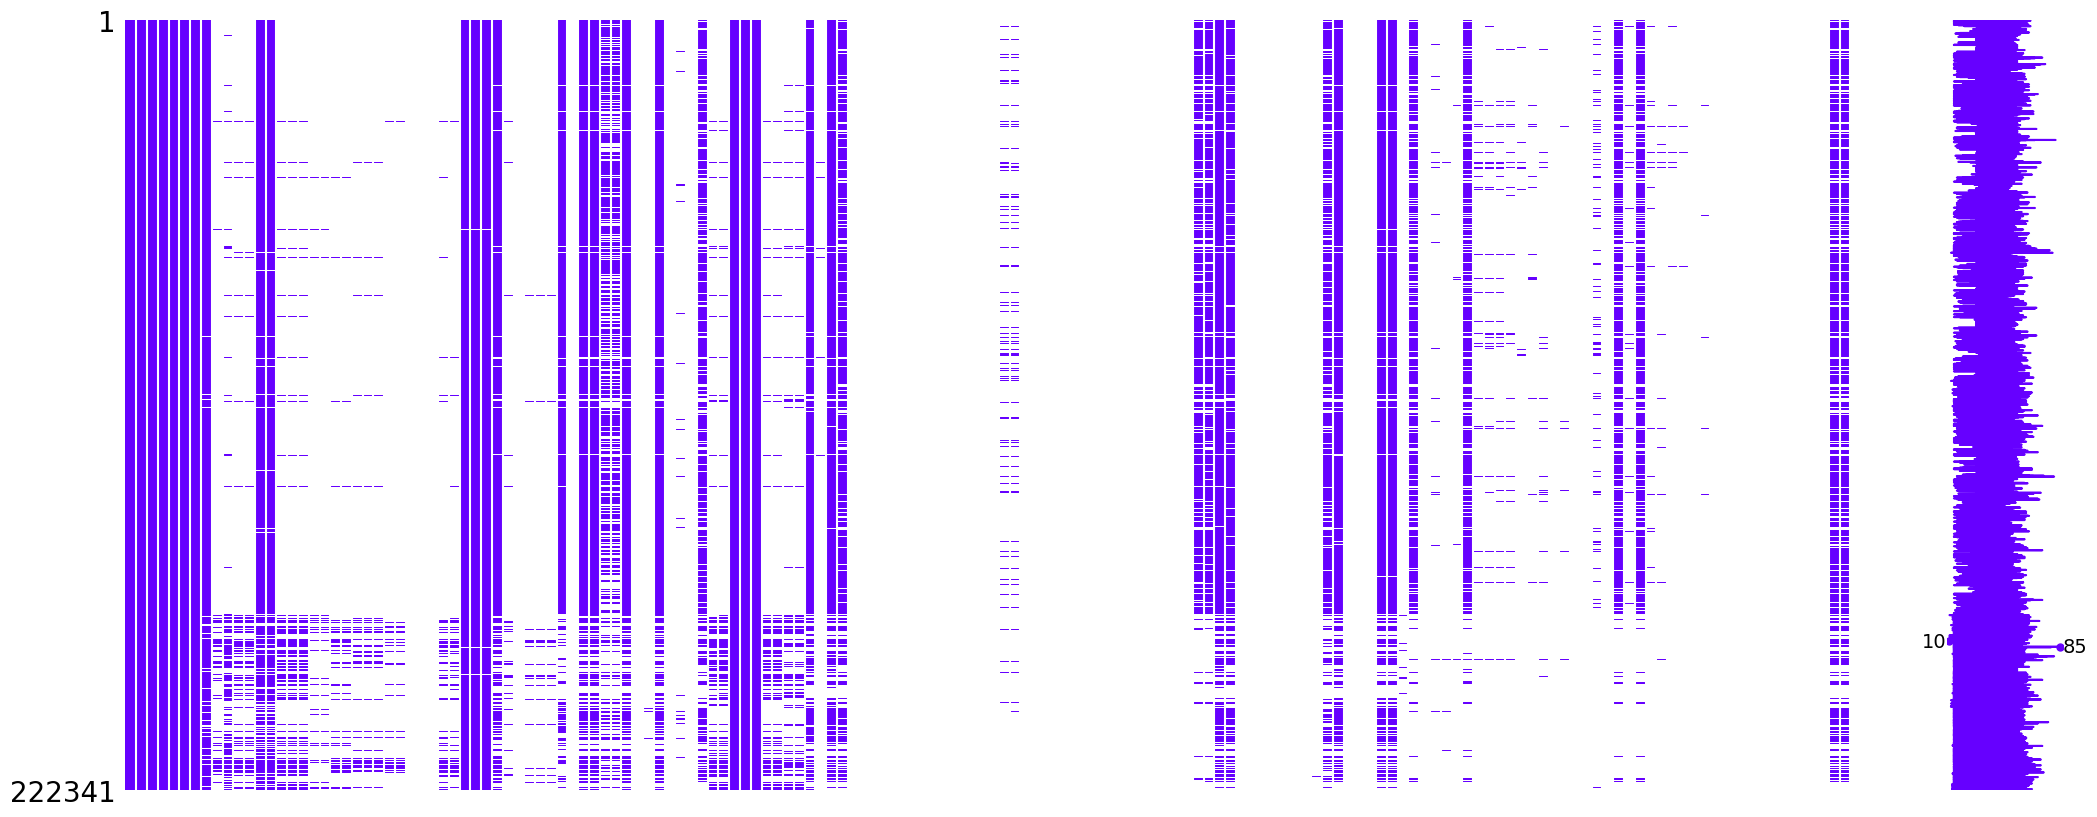

In [7]:
import missingno as msno
%matplotlib inline
msno.matrix(df_autre,color=(0.4,0,1))

<AxesSubplot:>

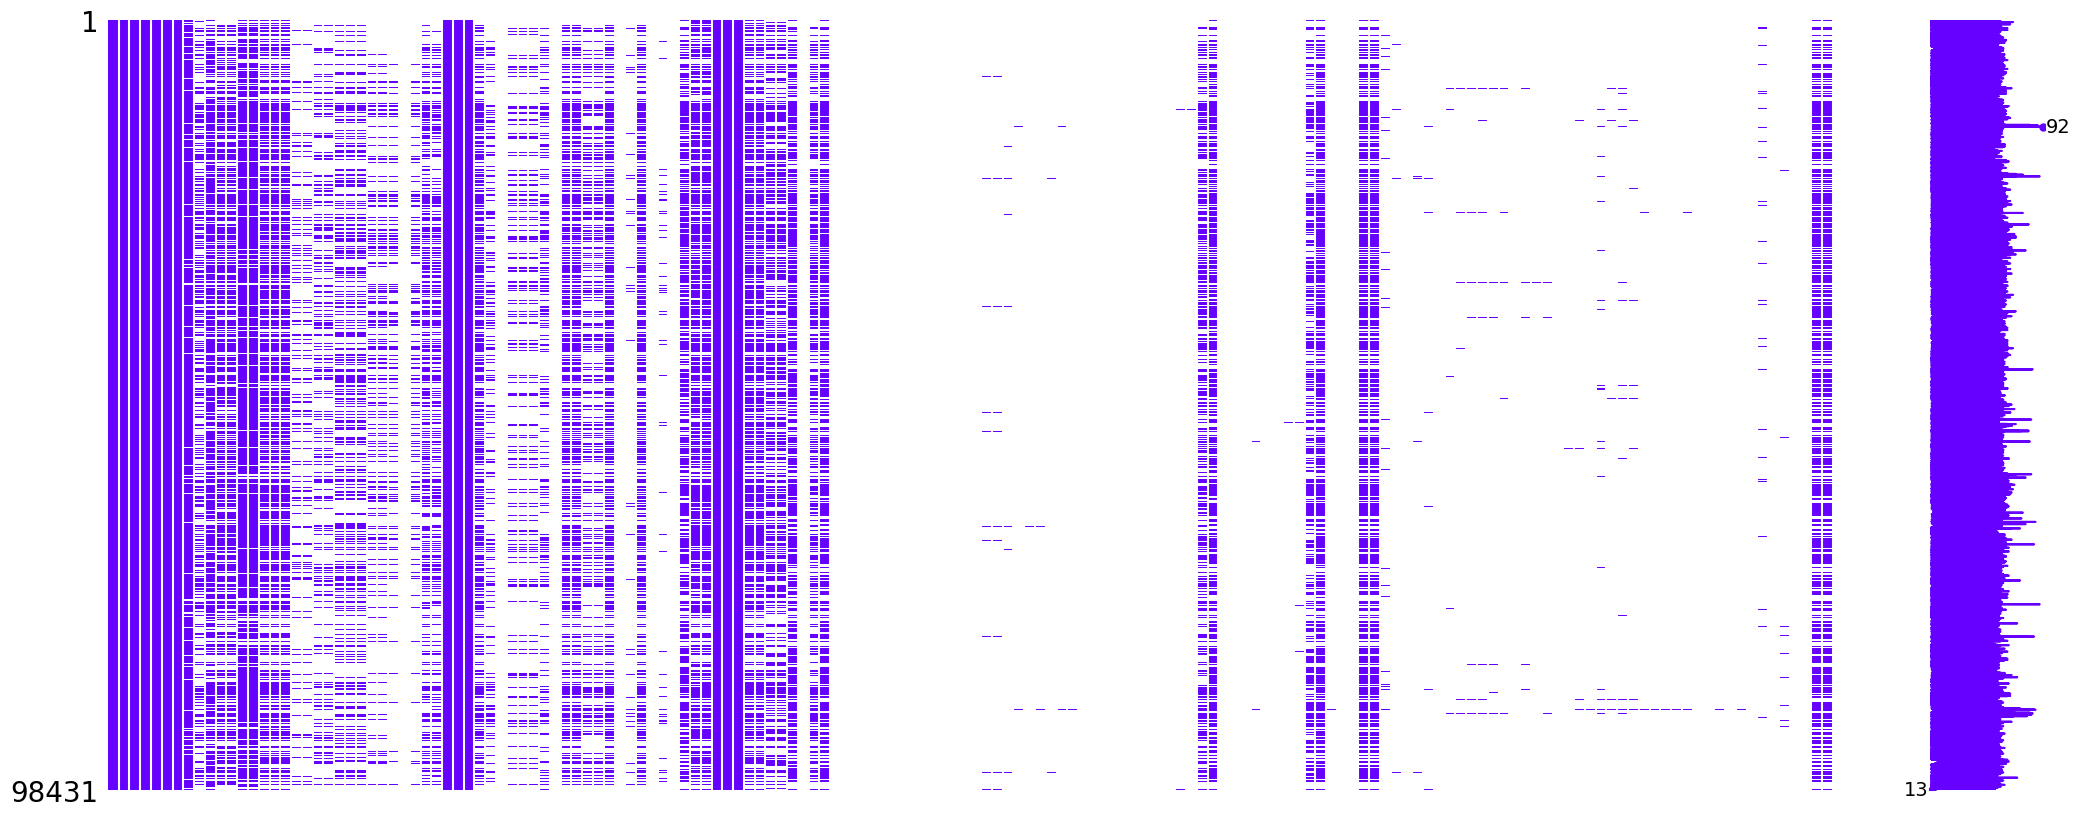

In [8]:
import missingno as msno
%matplotlib inline
msno.matrix(df,color=(0.4,0,1))

In [9]:
# Suppression des variables en rapport avec le pays
df = df.drop(columns=["countries","countries_tags","countries_fr"])

In [10]:
# Création d'une fonction qui permet la représentation graphique des valeurs nulles

def graph_null(df,long):
    
   
    val_nul = pd.DataFrame(round(df.isnull().sum()/df.shape[0],3),columns=['% val_nulle'])
    val_nul = val_nul.sort_values("% val_nulle", ascending=False)

    val_nul=val_nul*100
    val_nul

    fig, ax = plt.subplots(figsize=(6, long))
    
    ax.set_xlim(0, 100)
    ax.set_xlabel( "",size=0 )
    sns.barplot(x =val_nul['% val_nulle']  , y =val_nul.index ,data = val_nul , color = 'r',orient='h')
    plt.setp(ax.get_yticklabels(),fontsize = 8)
    plt.title("% de valeur manquante par colonne")

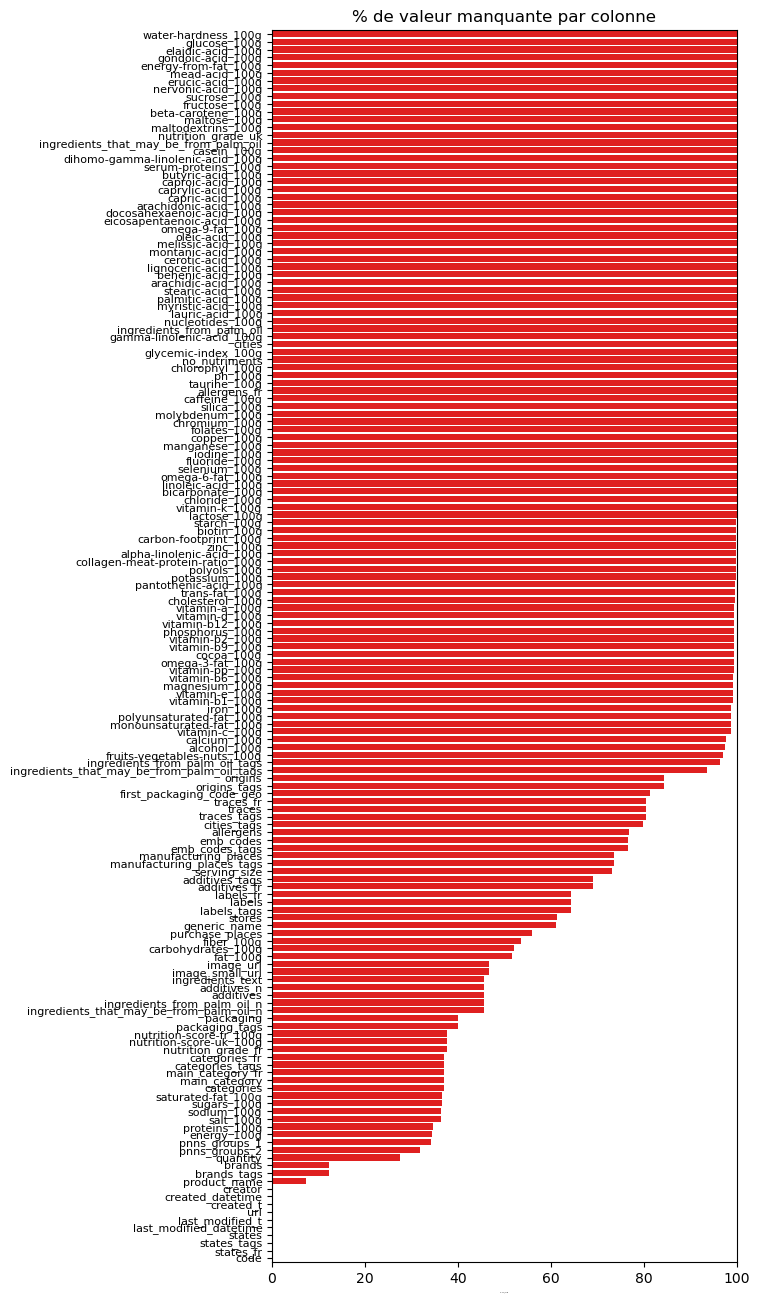

In [11]:
graph_null(df,16)

In [12]:
# Suppression des colonnes qui ont plus de 80% de valeurs manquantes

for X in list(df.columns):
    if (df[X].isnull().sum()/df.shape[0]) > 0.8 :
        df = df.drop(columns=[X])

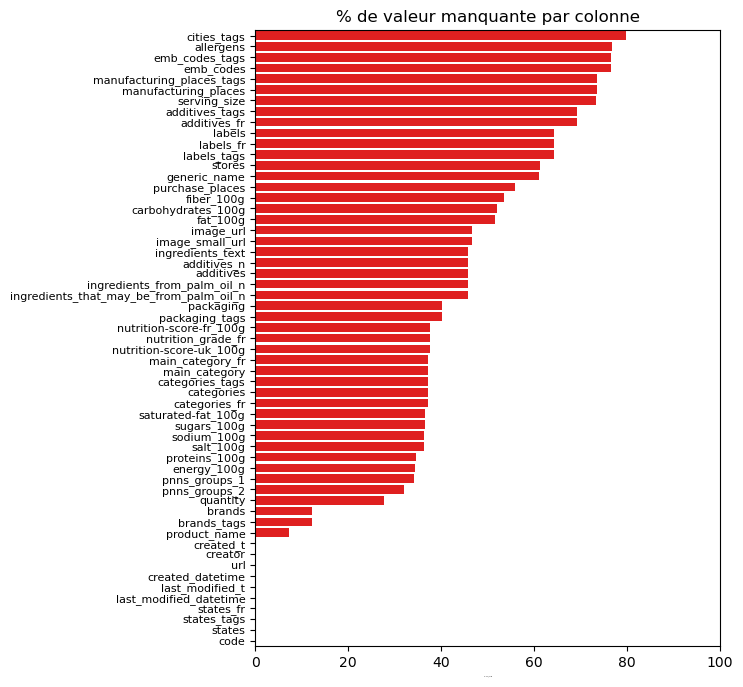

In [13]:
graph_null(df,8)

###  Variable quantity

In [121]:
df["quantity"].unique()

array([nan, '15 cl', '880 g', ..., '340 g (égoutté : 210 g) 380 ml',
       '435 ml', '250 g (10 pièces)'], dtype=object)

In [122]:
len(df["quantity"].unique())

4739

>Cette variable est à priori très intéressante pour faire des calculs puisque plusieurs variables numeriques sont données pour 100g, mais il y a trop de type différent.

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">2. ⌛️Variables temporelles</div>   
<a class="anchor" id="Par_2"></a> 

****

> Quatre variables sont temporelles. Nous analysons leurs pertinances.      
 

In [14]:
df["created_t"] = pd.to_numeric(df["created_t"],downcast='integer')
df['created_t'] = df['created_t'].apply(lambda x:datetime.datetime.fromtimestamp(x))  

In [15]:
df

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 11:17:46,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,2015-06-17 10:45:04,2015-06-17T08:45:04Z,1434535914,2015-06-17T10:11:54Z,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2016-03-17 19:17:10,2016-03-17T18:17:10Z,1458238638,2016-03-17T18:17:18Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,36252,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2015-01-25 22:35:01,2015-01-25T21:35:01Z,1489055667,2017-03-09T10:34:27Z,Lion Peanut x2,NaN,NaN,...,20.0,12.5,70.0,57.5,2.5,2.5,0.09652,0.038,22.0,22.0
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2015-01-25 22:36:13,2015-01-25T21:36:13Z,1473538082,2016-09-10T20:08:02Z,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,2013-07-10 20:20:08,2013-07-10T18:20:08Z,1451851215,2016-01-03T20:00:15Z,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320763,99111250,http://world-fr.openfoodfacts.org/produit/9911...,balooval,2013-04-28 17:30:39,2013-04-28T15:30:39Z,1371690556,2013-06-20T01:09:16Z,Thé vert Earl grey,thé bio équitable,50 g,...,0.2,0.2,0.5,0.5,0.2,0.5,0.02540,0.010,2.0,0.0
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,2015-04-27 22:52:34,2015-04-27T20:52:34Z,1430167992,2015-04-27T20:53:12Z,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,2015-10-31 13:07:09,2015-10-31T12:07:09Z,1446376839,2015-11-01T11:20:39Z,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['last_modified_datetime'] = pd.to_datetime(df['last_modified_datetime'])

In [17]:
df["last_modified_t"] = pd.to_numeric(df["last_modified_t"],downcast='integer')
df['last_modified_t'] = df['last_modified_t'].apply(lambda x:datetime.datetime.fromtimestamp(x))  

In [18]:
df['last_modified_t'].equals(df['created_t'])

False

<AxesSubplot:xlabel='created_t', ylabel='Count'>

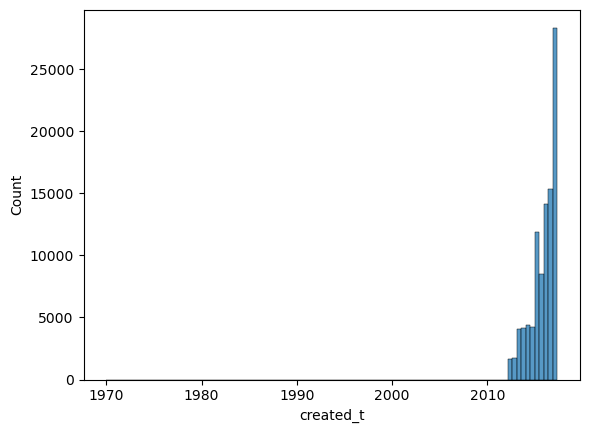

In [19]:
sns.histplot(data=df, x="created_t",bins=100)

In [20]:
len(df[df["created_t"]<"2010"])

1

In [21]:
df= df[df["created_t"]>"2010"]

<AxesSubplot:xlabel='created_t', ylabel='Count'>

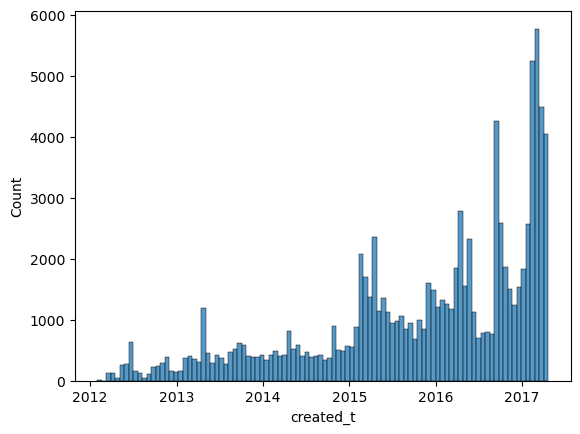

In [22]:
sns.histplot(data=df, x="created_t",bins=100)

<AxesSubplot:xlabel='last_modified_t', ylabel='Count'>

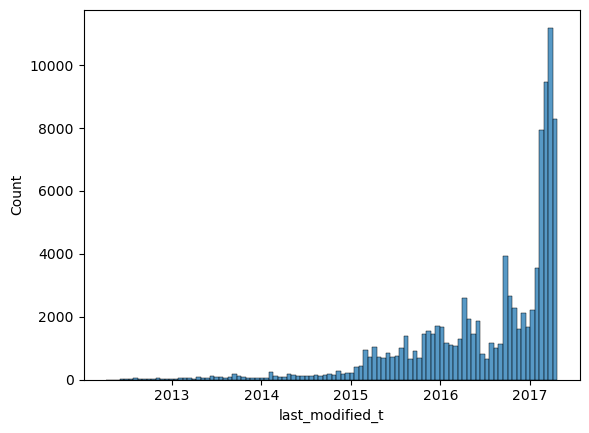

In [23]:
sns.histplot(data=df, x="last_modified_t",bins=100)

In [24]:
df['last_modified_t'].equals(df['created_t'])

False

>Environ la moitié des données ont été modifié entre 2017 et 2019,    
nous ne pouvons pas en savoir plus, les recettes changent-elles ?

> Suppression des doublons

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">3. Suppression des colonnes identiques</div>   
<a class="anchor" id="Par_3"></a> 

****

> Plusieurs variables qualitatives sont en doubles. Nous gardons un nombre restraint de colonnes

In [25]:
# Création d'une fonction pour vérifier si il y a une valeur pour chaque ligne
# par opposition au valeur null

def verif_col(col1,col2):
    a = (df[(df[col1].isnull()) & (df[col2].isnull())].shape[0]) / df[df[col1].isnull()].shape[0]
    b = (df[(df[col1].isnull()) & (df[col2].isnull())].shape[0]) / df[df[col2].isnull()].shape[0]
    if a==b :
        print(col1," et ", col2," ont des valeurs pour les mêmes lignes")
    elif a == 1:
        print(col1," et ", col2," ont des valeurs pour les mêmes lignes")
    else:
        print("les variables ont ",round(a,5)*100,"% de même lignes remplies")

In [26]:
# Création d'une fonction pour vérifier l'égalité stricte entre 2 colonnes

def count_diff(x,y):
    diff = (df[~(df[x].isin(df[y]))].shape[0]/df.shape[0])*100
    print(round(diff,1),"% des lignes ne sont pas exactement identiques entre les deux variables")

In [27]:
print(df['packaging'].equals(df['packaging_tags']))
verif_col("packaging","packaging_tags")
count_diff("packaging","packaging_tags")

False
packaging  et  packaging_tags  ont des valeurs pour les mêmes lignes
50.5 % des lignes ne sont pas exactement identiques entre les deux variables


In [28]:
verif_col("labels_fr","labels")
count_diff("labels_fr","labels")

les variables ont  99.997 % de même lignes remplies
12.3 % des lignes ne sont pas exactement identiques entre les deux variables


In [29]:
verif_col("additives_fr","additives_tags")
count_diff("additives_fr","additives_tags")

additives_fr  et  additives_tags  ont des valeurs pour les mêmes lignes
30.9 % des lignes ne sont pas exactement identiques entre les deux variables


In [30]:
verif_col("pnns_groups_1","pnns_groups_2")
count_diff("pnns_groups_1","pnns_groups_2")

les variables ont  93.573 % de même lignes remplies
53.2 % des lignes ne sont pas exactement identiques entre les deux variables


In [31]:
len(df["pnns_groups_1"].unique())

14

In [32]:
len(df["pnns_groups_2"].unique())

42

In [33]:
# Affichage des valeurs uniques de la variable 
df["pnns_groups_2"].unique()

array([nan, 'unknown', 'Legumes', 'Biscuits and cakes', 'Sweets',
       'Non-sugared beverages', 'Sweetened beverages', 'Meat',
       'One-dish meals', 'Soups', 'Chocolate products',
       'Alcoholic beverages', 'Sandwich', 'Cheese', 'Appetizers',
       'Dressings and sauces', 'Dried fruits', 'Nuts',
       'Breakfast cereals', 'Pizza pies and quiche', 'Fruits',
       'Fruit juices', 'Fats', 'Cereals', 'Vegetables', 'Bread',
       'Processed meat', 'vegetables', 'Ice cream', 'Fish and seafood',
       'pastries', 'Milk and yogurt', 'Dairy desserts', 'Tripe dishes',
       'Artificially sweetened beverages', 'Fruit nectars', 'Potatoes',
       'Eggs', 'Salty and fatty products', 'fruits', 'legumes', 'cereals'],
      dtype=object)

In [34]:
df["pnns_groups_2"].isnull().sum()

31403

In [35]:
def val_unique(df,x):
    val = df[x].unique()
    liste=[]
    for i in val:
        a=round(((df[df[x]==i].shape[0])/df.shape[0])*100,2)
        liste.append(a)
    df_val = pd.DataFrame(index=val,data=liste,columns=["% des données"])
    ap=100-(df_val["% des données"].sum())
    ap=pd.DataFrame(index=["null"], columns=["% des données"], data=ap)
    df_val = pd.concat([ap,df_val])
    return df_val

In [36]:
val_unique(df,"pnns_groups_1")

,% des données
null,34.09
NaN,0.00
unknown,12.68
Cereals and potatoes,6.22
Sugary snacks,9.56
Beverages,6.70
Fish Meat Eggs,6.88
Composite foods,6.14
Fruits and vegetables,4.14
Milk and dairy products,6.53


In [37]:
df[df["pnns_groups_1"].isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 11:17:46,2016-09-17T09:17:46Z,2016-09-17 11:18:13,2016-09-17 09:18:13+00:00,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2016-03-17 19:17:10,2016-03-17T18:17:10Z,2016-03-17 19:17:18,2016-03-17 18:17:18+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,10187319,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,2017-02-17 11:05:54,2017-02-17T10:05:54Z,2017-02-17 11:05:54,2017-02-17 10:05:54+00:00,Mini Confettis,NaN,NaN,...,NaN,0.80,NaN,87.70,0.9,0.60,0.010,0.003937,14.0,14.0
191,10207260,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,2017-03-22 18:17:11,2017-03-22T17:17:11Z,2017-03-22 18:29:17,2017-03-22 17:29:17+00:00,Praliné Amande Et Noisette,NaN,NaN,...,NaN,2.90,NaN,50.30,3.9,9.50,0.003,0.001181,14.0,14.0
194,20004552,http://world-fr.openfoodfacts.org/produit/0000...,agamitsudo,2016-09-17 10:09:01,2016-09-17T08:09:01Z,2016-09-17 10:09:28,2016-09-17 08:09:28+00:00,Côte du Rhône village,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320757,9900000000233,http://world-fr.openfoodfacts.org/produit/9900...,kiliweb,2017-04-01 22:52:18,2017-04-01T20:52:18Z,2017-04-01 22:52:19,2017-04-01 20:52:19+00:00,Amandes,NaN,NaN,...,NaN,3.73,NaN,3.89,12.2,21.22,0.100,0.039370,0.0,0.0
320760,99044169,http://world-fr.openfoodfacts.org/produit/9904...,date-limite-app,2015-01-21 21:50:58,2015-01-21T20:50:58Z,2016-04-17 15:04:46,2016-04-17 13:04:46+00:00,Poireaux,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,2013-07-10 20:20:08,2013-07-10T18:20:08Z,2016-01-03 21:00:15,2016-01-03 20:00:15+00:00,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,2015-04-27 22:52:34,2015-04-27T20:52:34Z,2015-04-27 22:53:12,2015-04-27 20:53:12+00:00,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
list(df["pnns_groups_2"].unique())

[nan,
 'unknown',
 'Legumes',
 'Biscuits and cakes',
 'Sweets',
 'Non-sugared beverages',
 'Sweetened beverages',
 'Meat',
 'One-dish meals',
 'Soups',
 'Chocolate products',
 'Alcoholic beverages',
 'Sandwich',
 'Cheese',
 'Appetizers',
 'Dressings and sauces',
 'Dried fruits',
 'Nuts',
 'Breakfast cereals',
 'Pizza pies and quiche',
 'Fruits',
 'Fruit juices',
 'Fats',
 'Cereals',
 'Vegetables',
 'Bread',
 'Processed meat',
 'vegetables',
 'Ice cream',
 'Fish and seafood',
 'pastries',
 'Milk and yogurt',
 'Dairy desserts',
 'Tripe dishes',
 'Artificially sweetened beverages',
 'Fruit nectars',
 'Potatoes',
 'Eggs',
 'Salty and fatty products',
 'fruits',
 'legumes',
 'cereals']

In [39]:
val_unique(df,"pnns_groups_2")

,% des données
null,31.90
NaN,0.00
unknown,12.68
Legumes,0.56
Biscuits and cakes,3.82
Sweets,3.48
Non-sugared beverages,2.93
Sweetened beverages,1.69
Meat,1.38
One-dish meals,5.03


In [40]:
df["pnns_groups_1"].unique()

array([nan, 'unknown', 'Cereals and potatoes', 'Sugary snacks',
       'Beverages', 'Fish Meat Eggs', 'Composite foods',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Fat and sauces', 'fruits-and-vegetables', 'sugary-snacks',
       'cereals-and-potatoes'], dtype=object)

In [41]:
# Pourcentage de cellule null de la variable pnn_group_2
(df[df["pnns_groups_2"].isnull()].shape[0])/(df.shape[0])*100

31.9038910901148

In [42]:
# Pourcentage de cellules null de la variable pnn_group_1
round(((df[df["pnns_groups_1"].isnull()].shape[0])/df.shape[0])*100,2)

34.1

In [43]:
df["nutrition_grade_fr"].unique()

array([nan, 'e', 'd', 'c', 'a', 'b'], dtype=object)

In [44]:
# nombre de ligne étant null simultaanement pour ces 3 variables
df[(df["nutrition_grade_fr"].isnull()) & (df["nutrition-score-fr_100g"].isnull()) & (df["pnns_groups_1"].isnull())].shape[0]

19375

In [45]:
# Forme du DF après traitement
df.shape

(98430, 57)

In [46]:
# Que trouve t-on dans le DF lorsque la variable nutrition_grade_fr est null
df[df["nutrition_grade_fr"].isnull()]

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,2016-09-17 11:17:46,2016-09-17T09:17:46Z,2016-09-17 11:18:13,2016-09-17 09:18:13+00:00,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,24600,http://world-fr.openfoodfacts.org/produit/0000...,date-limite-app,2015-06-17 10:45:04,2015-06-17T08:45:04Z,2015-06-17 12:11:54,2015-06-17 10:11:54+00:00,Filet de bœuf,NaN,2.46 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,27205,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2016-03-17 19:17:10,2016-03-17T18:17:10Z,2016-03-17 19:17:18,2016-03-17 18:17:18+00:00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136,39259,http://world-fr.openfoodfacts.org/produit/0000...,tacinte,2015-01-25 22:36:13,2015-01-25T21:36:13Z,2016-09-10 22:08:02,2016-09-10 20:08:02+00:00,Twix x2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,39529,http://world-fr.openfoodfacts.org/produit/0000...,teolemon,2015-01-01 22:17:31,2015-01-01T21:17:31Z,2017-03-09 11:34:12,2017-03-09 10:34:12+00:00,Pack de 2 Twix,NaN,NaN,...,4.17,NaN,77.08,NaN,6.2,6.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320760,99044169,http://world-fr.openfoodfacts.org/produit/9904...,date-limite-app,2015-01-21 21:50:58,2015-01-21T20:50:58Z,2016-04-17 15:04:46,2016-04-17 13:04:46+00:00,Poireaux,NaN,1 kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320761,9906410000009,http://world-fr.openfoodfacts.org/produit/9906...,agamitsudo,2013-07-10 20:20:08,2013-07-10T18:20:08Z,2016-01-03 21:00:15,2016-01-03 20:00:15+00:00,Roussette du Bugey (2011),Vins blanc du Bugey,750 ml,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320764,9918,http://world-fr.openfoodfacts.org/produit/9918...,woshilapin,2015-04-27 22:52:34,2015-04-27T20:52:34Z,2015-04-27 22:53:12,2015-04-27 20:53:12+00:00,"Cheese cake thé vert, yuzu",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320765,9935010000003,http://world-fr.openfoodfacts.org/produit/9935...,sebleouf,2015-10-31 13:07:09,2015-10-31T12:07:09Z,2015-11-01 12:20:39,2015-11-01 11:20:39+00:00,Rillette d'oie,NaN,180 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98430 entries, 0 to 320770
Data columns (total 57 columns):
 #   Column                                   Non-Null Count  Dtype              
---  ------                                   --------------  -----              
 0   code                                     98430 non-null  object             
 1   url                                      98430 non-null  object             
 2   creator                                  98430 non-null  object             
 3   created_t                                98430 non-null  datetime64[ns]     
 4   created_datetime                         98430 non-null  object             
 5   last_modified_t                          98430 non-null  datetime64[ns]     
 6   last_modified_datetime                   98430 non-null  datetime64[ns, UTC]
 7   product_name                             91248 non-null  object             
 8   generic_name                             38295 non-null  object  

In [48]:
count_diff("states","states_tags")

100.0 % des lignes ne sont pas exactement identiques entre les deux variables


In [49]:
df[["states","states_tags"]]

,states,states_tags
0,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co..."
46,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co..."
48,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co..."
106,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete..."
136,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co..."
...,...,...
320761,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete..."
320763,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact..."
320764,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co..."
320765,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact..."


In [50]:
verif_col("main_category","main_category_fr")
count_diff("main_category","main_category_fr")

main_category  et  main_category_fr  ont des valeurs pour les mêmes lignes
62.9 % des lignes ne sont pas exactement identiques entre les deux variables


In [51]:
df[["main_category","main_category_fr"]]

,main_category,main_category_fr
0,NaN,NaN
46,fr:filet-de-boeuf,Filet-de-boeuf
48,NaN,NaN
106,NaN,NaN
136,NaN,NaN
...,...,...
320761,en:beverages,Boissons
320763,en:green-teas,Thés verts
320764,NaN,NaN
320765,en:salted-spreads,Produits à tartiner salés


In [52]:
verif_col("categories","categories_fr")
count_diff("categories","categories_fr")

categories  et  categories_fr  ont des valeurs pour les mêmes lignes
45.8 % des lignes ne sont pas exactement identiques entre les deux variables


In [53]:
verif_col("image_small_url","image_url")
count_diff("image_small_url","image_url")

image_small_url  et  image_url  ont des valeurs pour les mêmes lignes
53.4 % des lignes ne sont pas exactement identiques entre les deux variables


In [54]:
verif_col("nutrition-score-fr_100g","nutrition-score-uk_100g")
count_diff("nutrition-score-fr_100g","nutrition-score-uk_100g")

nutrition-score-fr_100g  et  nutrition-score-uk_100g  ont des valeurs pour les mêmes lignes
0.0 % des lignes ne sont pas exactement identiques entre les deux variables


In [55]:
verif_col("manufacturing_places","manufacturing_places_tags")
count_diff("manufacturing_places","manufacturing_places_tags")

manufacturing_places  et  manufacturing_places_tags  ont des valeurs pour les mêmes lignes
26.3 % des lignes ne sont pas exactement identiques entre les deux variables


In [56]:
df["manufacturing_places_tags"].unique()

array([nan, 'france,avranches', 'etats-unis', ..., 'australie',
       'auckland,new-zealand', 'republique-cooperative-du-guyana'],
      dtype=object)

In [57]:
# Suppression des colonnes

df = df.drop(columns=["url","created_datetime","states","states_tags","additives_tags","labels","packaging_tags","image_small_url",
                      "main_category","nutrition-score-uk_100g","last_modified_datetime","generic_name","brands_tags",
                     "labels_tags","categories_tags","additives_n","categories","manufacturing_places_tags"])

***
[<font color=blue> Retour à la Table Des Matières](#retour)

****

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">4. Gestion des outliers (IQR & Filtres)</div>   
<a class="anchor" id="Par_4"></a> 

****

>Pour chaque variable données pour 100g, nous supprimons les lignes pour lesquelles les cellules renvoient des résultats de plus de 100g.        
La seule variable pour laquelle c'est possible, est la variable energy_100g.

Deux méthode sont utilisées:
- IQR si les outliers sont identifiés comme un groupe distinct
- Filtre dans le cas où les outliers sont très proche du dernier quartile

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98430 entries, 0 to 320770
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   code                                     98430 non-null  object        
 1   creator                                  98430 non-null  object        
 2   created_t                                98430 non-null  datetime64[ns]
 3   last_modified_t                          98430 non-null  datetime64[ns]
 4   product_name                             91248 non-null  object        
 5   quantity                                 71233 non-null  object        
 6   packaging                                58979 non-null  object        
 7   brands                                   86422 non-null  object        
 8   categories_fr                            61952 non-null  object        
 9   manufacturing_places                  

In [59]:
# Pour chaque variable données pour 100g nous supprimons les lignes pour lesquelles 
# les cellules renvoient des résultats de plus de 100g.        

for x in range(30,37):
    df = df[ (df.iloc[:,x]<=100) | (df.iloc[:,x].isnull()) ]

In [60]:
df.shape

(98418, 39)

<AxesSubplot:>

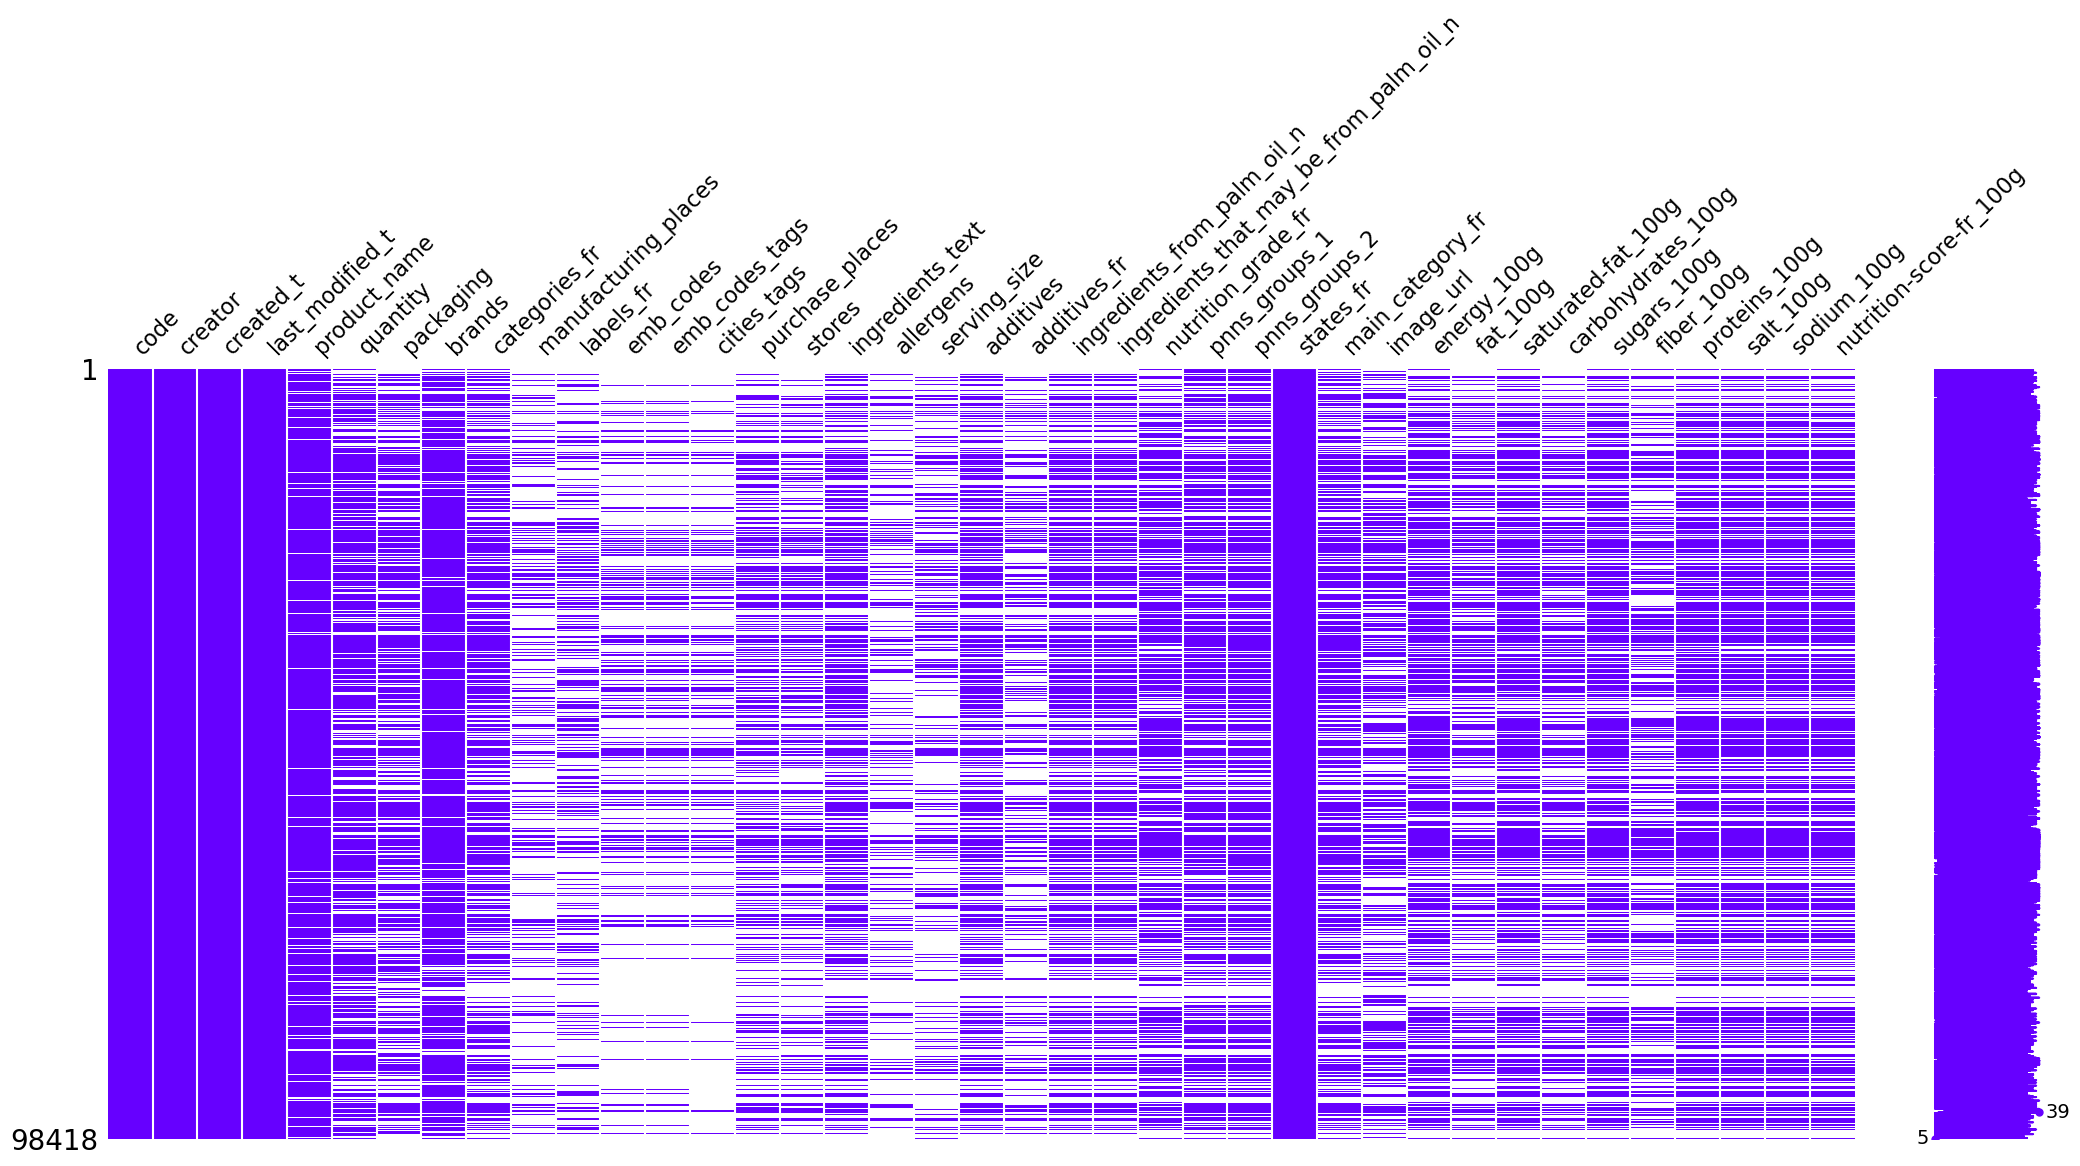

In [61]:
import missingno as msno
%matplotlib inline
msno.matrix(df,color=(0.4,0,1))

pd.plotting.scatter_matrix(df,figsize=(14,14))
plt.show()

In [62]:
# Fonction affichant une boxplot et le pourcentage d'outliers

def val_ext(x,a):
    plt.figure(figsize = (3,3))
    sns.boxplot(x=df[x])
    print(round((df[df[x]>a].shape[0]/df.shape[0])*100,2),"% d'Outliers'")

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">4.1 Variable Energy_100g</div>
<a class="anchor" id="Section_4.1"></a> 

<AxesSubplot:xlabel='energy_100g', ylabel='Count'>

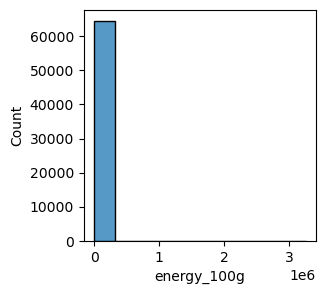

In [63]:
plt.figure(figsize = (3,3))
sns.histplot(data=df, x="energy_100g",bins=10)

In [64]:
df["energy_100g"].describe()

count    6.459000e+04
mean     1.171193e+03
std      1.283601e+04
min      0.000000e+00
25%      4.270000e+02
50%      1.035000e+03
75%      1.649000e+03
max      3.251373e+06
Name: energy_100g, dtype: float64

1.11 % d'Outliers'


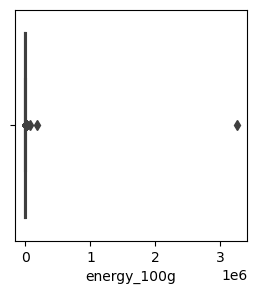

In [65]:
val_ext("energy_100g",3000)

In [66]:
df[df["energy_100g"]>5000]

,code,creator,created_t,last_modified_t,product_name,quantity,packaging,brands,categories_fr,manufacturing_places,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
56561,43647390011,kiliweb,2017-03-10 21:31:25,2017-03-10 21:31:25,Tawny' Orange,NaN,NaN,Wilkin sons ltd,NaN,NaN,...,5054.0,NaN,0.00,NaN,65.00,0.0,0.0,0.000,0.000000,20.0
178787,20233679,openfoodfacts-contributors,2016-04-16 14:57:31,2017-04-20 09:42:28,Halva with Almonds,250 g e,"Carton,Plastique,PAP,21,03,PVC","Eridanous,Lidl","Snacks sucrés,Confiseries,Halvas,Pates-de-sesame",Grèce,...,9983.0,36.8,7.80,44.2,32.00,NaN,12.9,0.000,0.000000,24.0
183135,2309640004224,kiliweb,2017-03-04 19:04:50,2017-03-04 19:04:50,Diot de Savoie,NaN,NaN,Mont Charvin,NaN,NaN,...,5050.0,NaN,9.70,NaN,0.00,0.0,18.0,22.000,8.661417,29.0
184758,26029245,kiliweb,2017-01-29 19:54:20,2017-01-29 19:54:20,Pesto Rosso,NaN,NaN,Delicato,NaN,NaN,...,5268.0,NaN,4.20,NaN,6.90,0.0,4.1,2.500,0.984252,25.0
188751,3024720026888,openfoodfacts-contributors,2017-03-12 10:17:23,2017-03-23 15:14:23,Rillettes De Poulet Roti,NaN,NaN,Bordeau Chesnel,NaN,NaN,...,5720.0,NaN,9.20,NaN,0.10,0.0,16.8,1.000,0.393701,23.0
188938,3029330067061,kiliweb,2016-11-14 16:30:41,2017-04-20 19:48:10,Baguettines viennoises briochées,NaN,NaN,Jacquet,NaN,NaN,...,5347.0,NaN,1.70,NaN,1.00,2.5,8.7,1.000,0.393701,12.0
189640,3033710069293,openfoodfacts-contributors,2013-09-27 23:56:04,2017-01-31 18:25:16,Fond pour rôtis,110g,NaN,Maggi,NaN,NaN,...,5452.0,NaN,1.30,NaN,9.10,4.1,7.1,18.000,7.086614,18.0
193248,3092718605216,openfoodfacts-contributors,2016-09-18 22:55:03,2017-01-29 20:09:58,Sirop de cerise,1,NaN,Teisseire,"Boissons,Sirops,Sirops aromatisés,Sirops de ce...",NaN,...,5904.0,NaN,0.00,NaN,83.00,0.0,0.0,0.000,0.000000,20.0
199505,3217690052616,kiliweb,2017-02-24 18:14:50,2017-02-24 18:14:51,Sirop Saveur pina Colada,NaN,NaN,FRUISS,NaN,NaN,...,5619.0,NaN,0.50,NaN,79.00,0.0,0.5,0.020,0.007874,20.0
199683,3222120028611,kiliweb,2017-04-02 15:36:49,2017-04-02 15:36:50,Chevre Pane,NaN,NaN,Valcrest,NaN,NaN,...,5205.0,NaN,12.00,NaN,2.00,0.0,14.0,1.300,0.511811,25.0


<AxesSubplot:xlabel='energy_100g', ylabel='Count'>

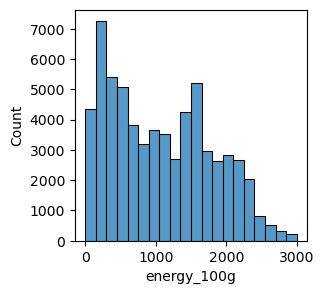

In [67]:
plt.figure(figsize = (3,3))
sns.histplot(data=(df[df["energy_100g"]<3000]), x="energy_100g",bins=20)

In [68]:
# Méthode IQR appliquée à la variable energy_100g

Q1, Q3 = df["energy_100g"].quantile([.25, .75])
IQR=Q3-Q1
filtered = df.query('(@Q1 - 1.5 * @IQR) <= energy_100g <= (@Q3 + 1.5 * @IQR)')

<AxesSubplot:xlabel='energy_100g'>

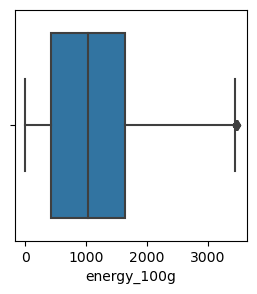

In [69]:
#Vérification visuelle de la méthode IQR

plt.figure(figsize = (3,3))
sns.boxplot(x=filtered["energy_100g"])

In [70]:
# Application du filtre IQR au df

df=filtered

In [71]:
df.shape

(64098, 39)

 <div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">4.2 Les autres variables</div>
<a class="anchor" id="Section_4.2"></a> 

2.23 % d'Outliers'


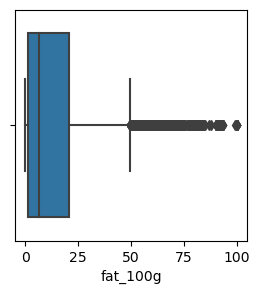

In [72]:
val_ext("fat_100g",50)

1.51 % d'Outliers'


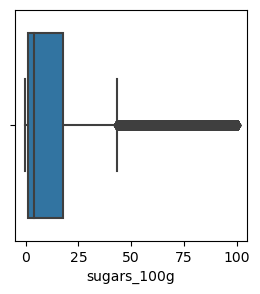

In [73]:
val_ext("sugars_100g",75)

2.61 % d'Outliers'


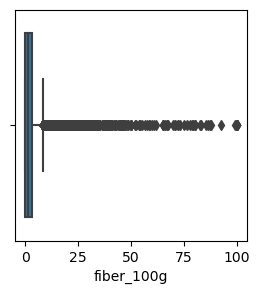

In [74]:
val_ext("fiber_100g",10)

0.2 % d'Outliers'


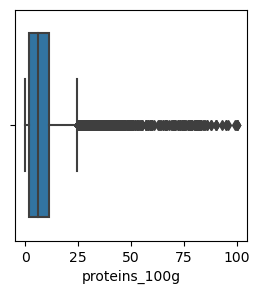

In [75]:
val_ext("proteins_100g",50)

In [76]:
df[df["fiber_100g"]>15]

,code,creator,created_t,last_modified_t,product_name,quantity,packaging,brands,categories_fr,manufacturing_places,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
14312,18627597612,openfoodfacts-contributors,2015-01-26 18:34:55,2017-01-27 05:22:11,Kashi GoLean Crunch Honey Almond Flax,NaN,NaN,Kashi,NaN,NaN,...,1925.0,NaN,1.0,NaN,26.00,18.00,20.00,3.200,1.259843,15.0
29151,34000666379,kiliweb,2017-03-30 18:04:09,2017-03-30 18:04:09,Reese's Peanut Butter Snowmen,NaN,NaN,Reese s,NaN,NaN,...,2226.0,NaN,11.6,NaN,53.90,25.00,9.80,0.700,0.275591,24.0
51839,41570120729,kiliweb,2017-04-13 13:51:34,2017-04-13 13:51:35,Amandes,NaN,NaN,Blue,NaN,NaN,...,2477.0,NaN,49.4,NaN,9.50,21.20,3.90,0.000,0.000000,14.0
66505,58449770206,kiliweb,2017-02-21 02:37:38,2017-03-09 15:25:51,"Nature's Path Organic Heritage Flakes Cereal, ...",NaN,NaN,Nature s path,NaN,NaN,...,1674.0,3.33,0.0,80.0,13.33,16.66,13.33,0.433,0.170472,-3.0
67939,66721005830,kiliweb,2017-03-07 05:37:46,2017-03-07 18:45:32,Pain Seigle au Sésame,NaN,NaN,Ryvita,"Aliments et boissons à base de végétaux,Alimen...",NaN,...,1464.0,NaN,0.0,NaN,0.00,20.00,10.00,0.350,0.137795,-5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317676,8936046153801,kiliweb,2017-02-21 20:21:12,2017-02-21 20:21:12,Chips De Crevettes à Frire,NaN,NaN,Auchan,NaN,NaN,...,1364.0,NaN,0.0,NaN,16.00,25.00,1.40,1.200,0.472441,7.0
317779,8997032221942,openfoodfacts-contributors,2016-06-22 12:05:49,2017-03-23 14:24:48,Cacao Cru en Poudre,250g,sachet refermable en plastique de type zip,Big Tree Farms,"Petit-déjeuners,Snacks sucrés,Chocolats,Chocol...",Indonésie,...,2153.0,30.00,21.0,7.0,0.00,35.00,19.00,0.010,0.003937,11.0
317781,8998008000134,kiliweb,2017-03-01 21:19:32,2017-03-01 21:19:33,Sauce Au Gingembre,NaN,NaN,Sauce Au Gingembre,NaN,NaN,...,264.0,NaN,0.0,NaN,14.52,33.00,0.99,0.984,0.387402,2.0
318228,9010128000890,kiliweb,2017-03-12 12:30:19,2017-03-12 12:30:20,Graine Chia WB,NaN,NaN,Women's Best,NaN,NaN,...,1941.0,NaN,3.3,NaN,0.90,38.00,20.00,0.010,0.003937,-2.0


0.01 % d'Outliers'


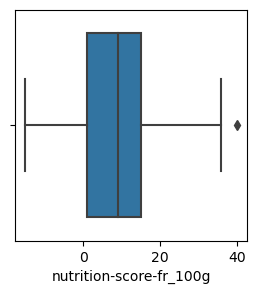

In [77]:
val_ext("nutrition-score-fr_100g",35)

In [78]:
df[df["nutrition-score-fr_100g"]>35].shape

(9, 39)

0.95 % d'Outliers'


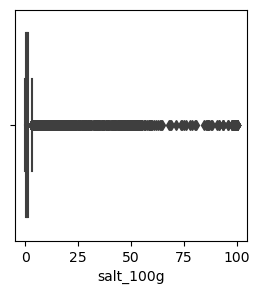

In [79]:
val_ext("salt_100g",10)

0.72 % d'Outliers'


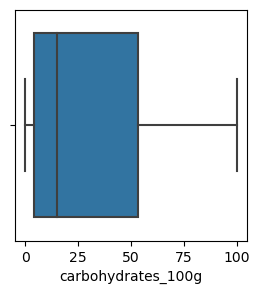

In [80]:
val_ext("carbohydrates_100g",90)

In [81]:
df.shape

(64098, 39)

In [82]:
# Suppression de tous les outliers des variables ci-dessus 

df= df[ ((df["fat_100g"]<50) & (df["sugars_100g"]<75) & (df["fiber_100g"]<25)&
        (df["proteins_100g"]<50) & (df["salt_100g"]<10))  |
       ((df["fat_100g"].isnull()) & (df["sugars_100g"]<75) & (df["fiber_100g"]<25)&
        (df["proteins_100g"]<50) & (df["salt_100g"]<10) ) |
       ((df["fiber_100g"].isnull())& (df["sugars_100g"]<75) & (df["fat_100g"]<50)&
        (df["proteins_100g"]<50) & (df["salt_100g"]<10)) ]


In [83]:
df.shape

(58023, 39)

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">4.3 Traitement des variables product_name et nutri_score</div>
<a class="anchor" id="Section_4.3"></a>

>Ces deux variables sont au coeur de l'étude et il n'est pas envisable de continuer avec des produits n'étant pas renseignés pour ces deux variables.

In [84]:
# Filtre les lignes ayant des cellules vide 
df = df.dropna(subset=['product_name', 'nutrition-score-fr_100g'],how="any")

In [85]:
df.shape

(57262, 39)

In [86]:
df

,code,creator,created_t,last_modified_t,product_name,quantity,packaging,brands,categories_fr,manufacturing_places,...,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
106,36252,tacinte,2015-01-25 22:35:01,2017-03-09 11:34:27,Lion Peanut x2,NaN,NaN,Sunridge,NaN,NaN,...,1883.0,20.0,12.50,70.0,57.50,2.5,2.50,0.09652,0.038000,22.0
191,10207260,kiliweb,2017-03-22 18:17:11,2017-03-22 18:29:17,Praliné Amande Et Noisette,NaN,NaN,Alice Délice,NaN,NaN,...,2406.0,NaN,2.90,NaN,50.30,3.9,9.50,0.00300,0.001181,14.0
226,40608754,andre,2012-08-15 11:48:28,2015-08-09 19:35:31,"Pepsi, Nouveau goût !",15 cl,Canette aluminium,Pepsi,"Boissons,Boissons gazeuses,Sodas,Sodas au cola...",NaN,...,177.0,0.0,0.00,10.4,10.40,0.0,0.00,0.02540,0.010000,13.0
234,69161025,kiliweb,2017-03-22 20:59:36,2017-03-22 20:59:36,Tarte Poireaux Et Lardons,NaN,NaN,Bo Frost,NaN,NaN,...,1079.0,NaN,11.00,NaN,1.00,1.4,7.50,0.80000,0.314961,15.0
240,87177756,tacite,2015-06-06 12:28:06,2015-06-06 13:13:26,7Up,33 cl,Canette,"7Up,Pepsico","Aliments et boissons à base de végétaux,Boisso...",NaN,...,177.0,0.0,0.00,10.4,10.40,NaN,0.00,0.10000,0.039370,13.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320734,9778564312457,kiliweb,2017-01-23 17:57:57,2017-04-02 17:15:34,Nature cheddar and red onion crisps,NaN,NaN,Marks and Spencer,"Snacks salés,Apéritif,Chips et frites,Chips",NaN,...,2155.0,NaN,3.40,NaN,1.80,5.6,7.80,1.35000,0.531496,9.0
320740,9782211109758,kiliweb,2017-03-08 21:05:58,2017-03-08 21:05:58,Verrine Cheescake Myrtille,NaN,NaN,Kayser,NaN,NaN,...,1084.0,NaN,12.00,NaN,10.50,0.0,8.70,0.29000,0.114173,16.0
320751,9847548283004,drmalabar,2015-07-25 11:47:06,2015-09-14 15:37:28,Tartines craquantes bio au sarrasin,NaN,"Boîte,Carton,Sachet,Plastique",Le Pain des fleurs,"Aliments et boissons à base de végétaux,Alimen...",France,...,1643.0,2.8,0.60,74.8,2.60,5.9,13.00,0.68000,0.267717,-4.0
320757,9900000000233,kiliweb,2017-04-01 22:52:18,2017-04-01 22:52:19,Amandes,NaN,NaN,Biosic,NaN,NaN,...,2406.0,NaN,3.73,NaN,3.89,12.2,21.22,0.10000,0.039370,0.0


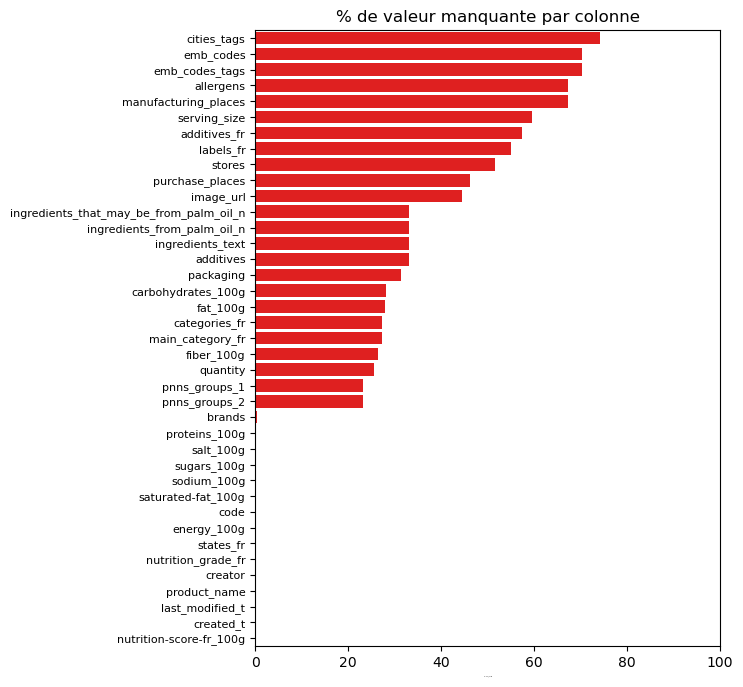

In [87]:
graph_null(df,8)

In [88]:
df.shape

(57262, 39)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57262 entries, 106 to 320763
Data columns (total 39 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   code                                     57262 non-null  object        
 1   creator                                  57262 non-null  object        
 2   created_t                                57262 non-null  datetime64[ns]
 3   last_modified_t                          57262 non-null  datetime64[ns]
 4   product_name                             57262 non-null  object        
 5   quantity                                 42614 non-null  object        
 6   packaging                                39328 non-null  object        
 7   brands                                   57070 non-null  object        
 8   categories_fr                            41618 non-null  object        
 9   manufacturing_places                

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">4.4 Suppression des variables qualitatives inutiles</div>
<a class="anchor" id="Section_4.4"></a>

>Supppression des variables soient parce qu'il y a trop de données manquantes et donc inutilisable      
soient inutile pour l'étude

In [90]:
# Nous concervons uniquement les variables pour lesquelles il y a suffisement de données

df = df[["code","creator","created_t","product_name","quantity","pnns_groups_2","pnns_groups_1","energy_100g","fat_100g","nutrition_grade_fr",
    "saturated-fat_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g","nutrition-score-fr_100g","carbohydrates_100g"]]

<AxesSubplot:>

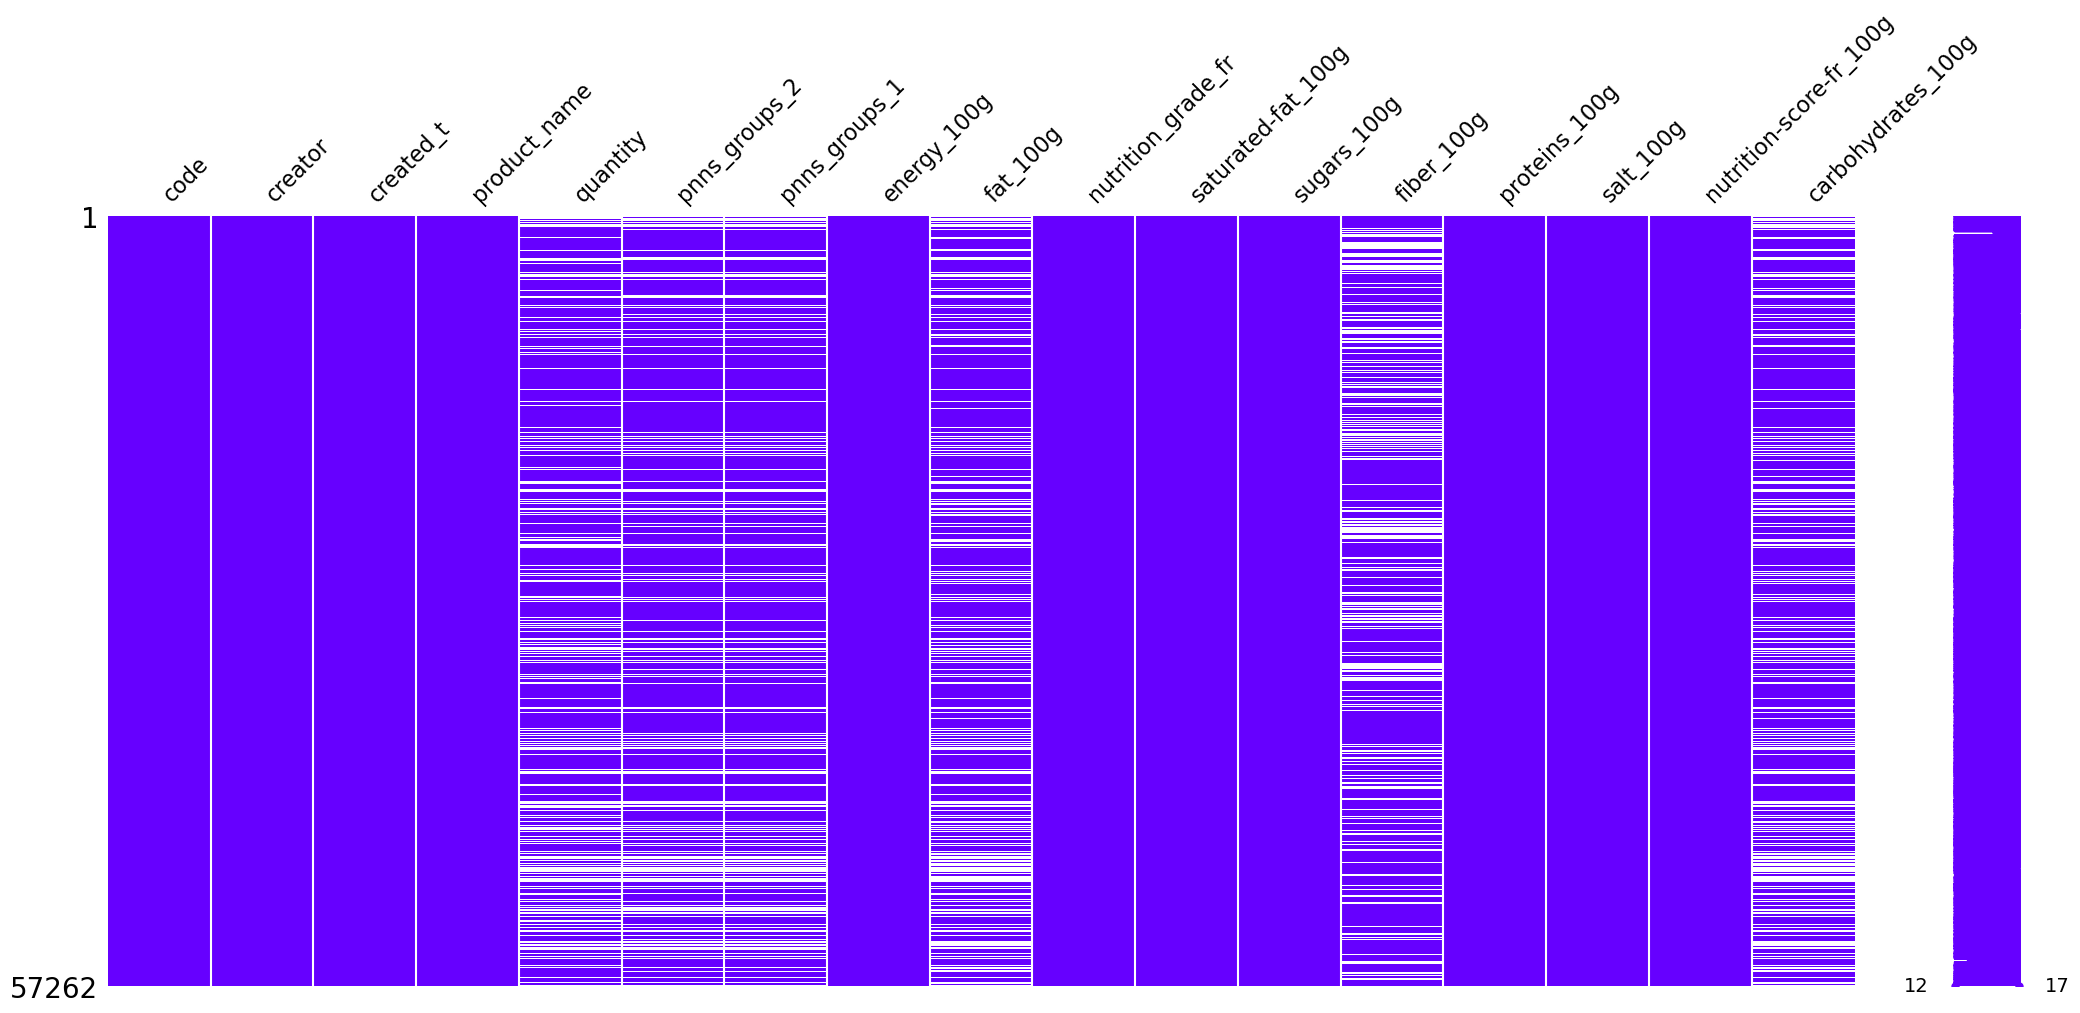

In [91]:
import missingno as msno
%matplotlib inline
msno.matrix(df,color=(0.4,0,1))

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">5. Données manquantes & imputations </div>   
<a class="anchor" id="Présentation"></a> 

****

 **Présentation des deux méthodes**

> La variable fibre n'a que 39 données manquante en commun avec la variable pnns_group_2.      
Nous utilisons la médiane de chaque groupe (pnn_groupe) et nutriscore pour renseigner les      
données manquantes.

> les variables fat_100g et carbohydrates_100g ont 30% de données manquantes en commun avec    
pnn_groups_2. Nous utiliserons la méthode du plus proche voisin, avec vérification graphique.    

> Nous vérifions que l'imputation ne modifie pas la structure des groupes du nutrigrade en     
affichant avant et après l'imputation, une boxplot de chaque groupe pour la variable en question.

In [92]:
pol=df.groupby('pnns_groups_2',dropna=False)
pol=pol[['nutrition-score-fr_100g']].agg([pd.Series.median])
pol.columns = ['/'.join(x) for x in pol.columns.values]
pol

,nutrition-score-fr_100g/median
pnns_groups_2,
Alcoholic beverages,8.0
Appetizers,13.0
Artificially sweetened beverages,2.0
Biscuits and cakes,19.0
Bread,1.0
Breakfast cereals,8.0
Cereals,-3.0
Cheese,14.0
Chocolate products,23.0


In [93]:
df[(df["pnns_groups_2"].isnull()) & (df["fiber_100g"].isnull() )].shape

(39, 17)

In [94]:
df[(df["pnns_groups_2"].isnull()) & (df["carbohydrates_100g"].isnull() )].shape

(12936, 17)

In [95]:
df[(df["pnns_groups_2"].isnull()) & (df["fat_100g"].isnull() )].shape

(12936, 17)

In [96]:
df[df["pnns_groups_2"].isnull()].shape

(13207, 17)

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">5.1 Imputation par la median de chaque groupe</div>
<a class="anchor" id="Section_5.1"></a>

In [97]:
# Création d'une liste composée de groupe de pnn
# les valeurs manquantes sont vues comme un groupe

list_pnn= list(df["pnns_groups_2"].unique())
list_pnn

['unknown',
 nan,
 'Sweetened beverages',
 'Biscuits and cakes',
 'One-dish meals',
 'Soups',
 'Non-sugared beverages',
 'Cheese',
 'Sweets',
 'Sandwich',
 'Dressings and sauces',
 'Appetizers',
 'Nuts',
 'Dried fruits',
 'Breakfast cereals',
 'Pizza pies and quiche',
 'Fruits',
 'Fruit juices',
 'Cereals',
 'Vegetables',
 'Bread',
 'Chocolate products',
 'Processed meat',
 'vegetables',
 'Ice cream',
 'Fish and seafood',
 'pastries',
 'Milk and yogurt',
 'Dairy desserts',
 'Meat',
 'Artificially sweetened beverages',
 'Fruit nectars',
 'Legumes',
 'Potatoes',
 'Alcoholic beverages',
 'Fats',
 'Salty and fatty products',
 'Tripe dishes',
 'Eggs',
 'fruits',
 'cereals']

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='pnns_groups_2'>

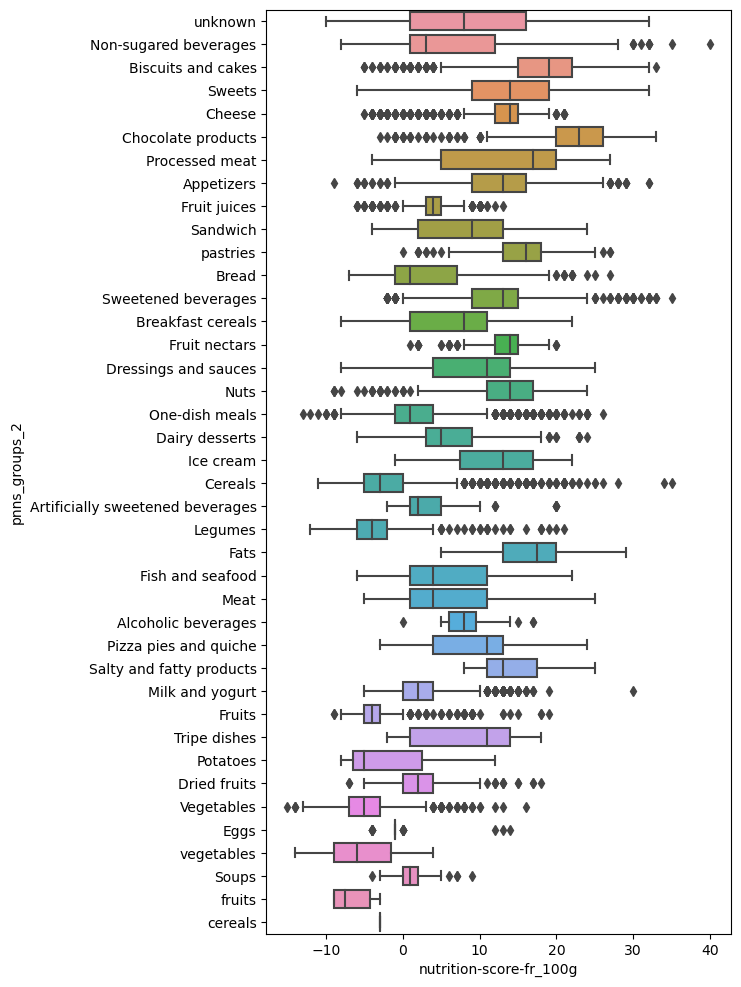

In [98]:
plt.figure(figsize = (6,12))
sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="nutrition-score-fr_100g",y="pnns_groups_2")

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='pnns_groups_1'>

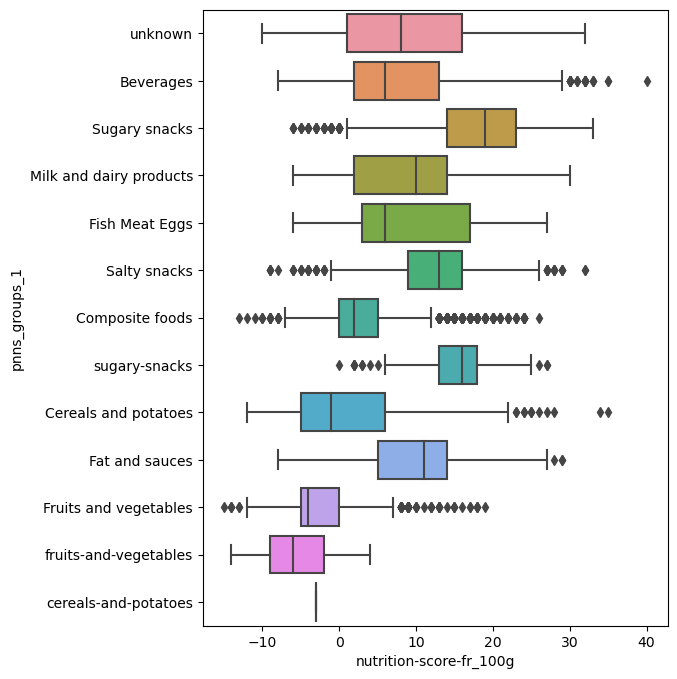

In [99]:
plt.figure(figsize = (6,8))
sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="nutrition-score-fr_100g",y="pnns_groups_1")

In [100]:
# Création du DF groupby pour chaque groupe de pnn_groups_2

g=df.groupby('pnns_groups_2',dropna=False)
g=g[['fiber_100g']].agg([pd.Series.mean,pd.Series.median,pd.Series.max])
g.columns = ['/'.join(x) for x in g.columns.values]
g

,fiber_100g/mean,fiber_100g/median,fiber_100g/max
pnns_groups_2,,,
Alcoholic beverages,0.019615,0.0,0.5
Appetizers,3.992415,4.0,21.0
Artificially sweetened beverages,0.317383,0.0,4.7
Biscuits and cakes,3.028213,2.6,24.0
Bread,5.042123,4.4,22.0
Breakfast cereals,6.610503,6.3,24.9
Cereals,3.624412,3.0,20.0
Cheese,0.138901,0.0,2.0
Chocolate products,5.739315,4.0,24.3


<AxesSubplot:xlabel='fiber_100g', ylabel='nutrition_grade_fr'>

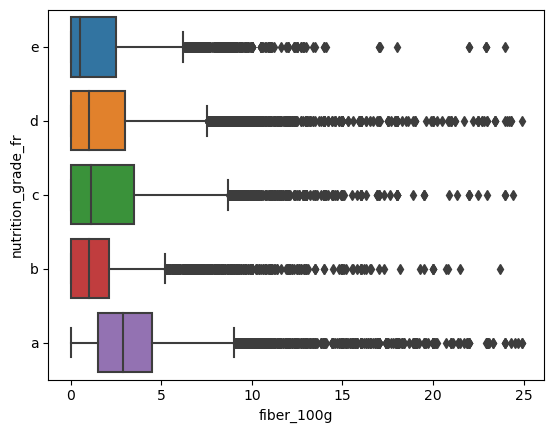

In [101]:
# Création de boxplot avant imputation

sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="fiber_100g",y="nutrition_grade_fr")

In [102]:
# Vérification que chaque élement de la liste correspondent aux index du df groupby

g.index.isin(list_pnn)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [103]:
# Imputation par la median de chaque classe des groupes pnns_groups_2

df['fiber_100g'].fillna(df.groupby(['pnns_groups_2',"nutrition_grade_fr"],dropna=False)['fiber_100g'].transform('median'))

106        2.5
191        3.9
226        0.0
234        1.4
240        0.0
          ... 
320734     5.6
320740     0.0
320751     5.9
320757    12.2
320763     0.2
Name: fiber_100g, Length: 57262, dtype: float64

<AxesSubplot:xlabel='fiber_100g', ylabel='nutrition_grade_fr'>

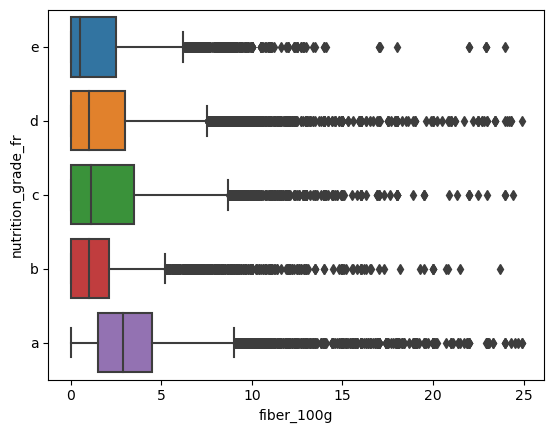

In [104]:
# Création de boxplot après imputation

sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="fiber_100g",y="nutrition_grade_fr")

In [105]:
# Suppression des 39 valeurs de fibre qui n'ont pas de valeur
df = df[~df['fiber_100g'].isnull()]

<div style="padding:20px;color:black;margin:0;font-size:150%;display:fill;border-radius:8px;background-color:#d9d9d9;overflow:hidden;font-weight:100">5.2 Imputation par la méthode des plus proches voisins (KNN)</div>
<a class="anchor" id="Présentation"></a>

>Utilisation de la méthode KNN sur les variables     
**les variables fat_100g & carbohydrates_100g** 

In [106]:
df[df["fat_100g"].isnull()].shape

(16038, 17)

<AxesSubplot:xlabel='fat_100g', ylabel='nutrition_grade_fr'>

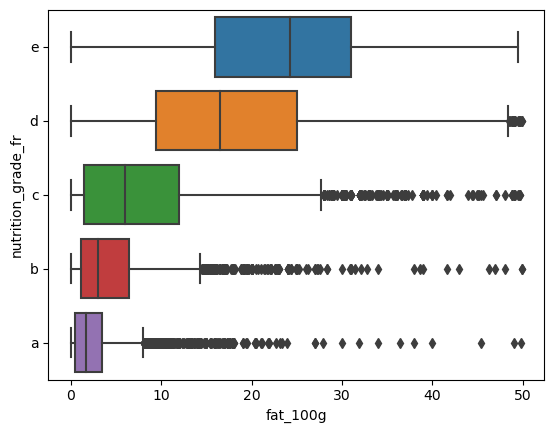

In [107]:
# Création de boxplot avant imputation

sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="fat_100g",y="nutrition_grade_fr")

In [108]:
df_imputation = df.select_dtypes(include='float')

In [109]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
imput = imputer.fit_transform(df_imputation)
imput=pd.DataFrame(imput,columns=df_imputation.columns)

In [110]:
# Remplacement des données manquantes

df["fat_100g"]=imput["fat_100g"].values

<AxesSubplot:xlabel='fat_100g', ylabel='nutrition_grade_fr'>

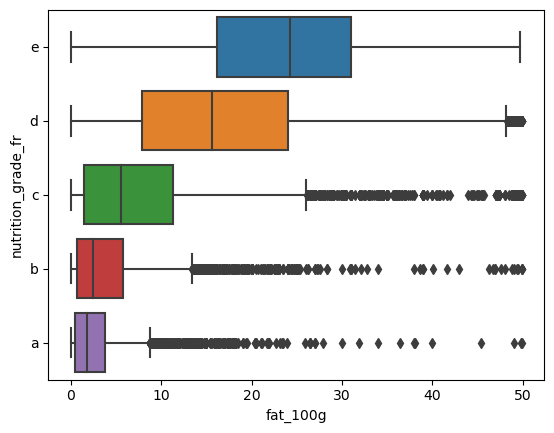

In [111]:
# Création de boxplot après imputation

sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="fat_100g",y="nutrition_grade_fr")

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='nutrition_grade_fr'>

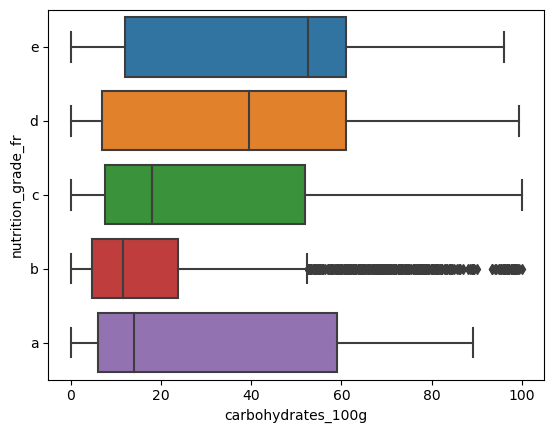

In [112]:
# Création de boxplot avant imputation

sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="carbohydrates_100g",y="nutrition_grade_fr")

In [113]:
# Remplacement des données manquantes

df["carbohydrates_100g"]=imput["carbohydrates_100g"].values

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='nutrition_grade_fr'>

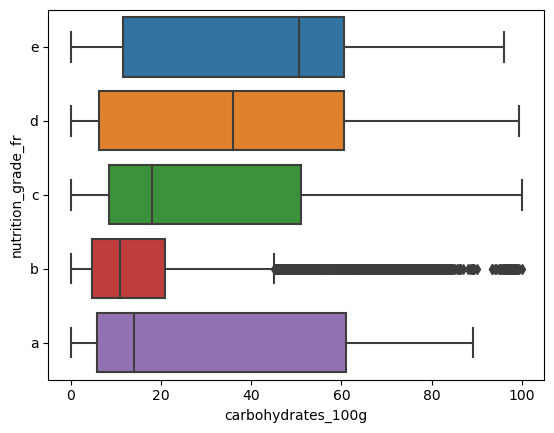

In [114]:
# Création de boxplot après imputation

sns.boxplot(data=df.sort_values([("nutrition_grade_fr")],ascending=False), x="carbohydrates_100g",y="nutrition_grade_fr")

> Les 3 variables sont stable au sens où la structure de chaque groupe du nutrigrade n'est pas modifié par l'imputation. 

<AxesSubplot:>

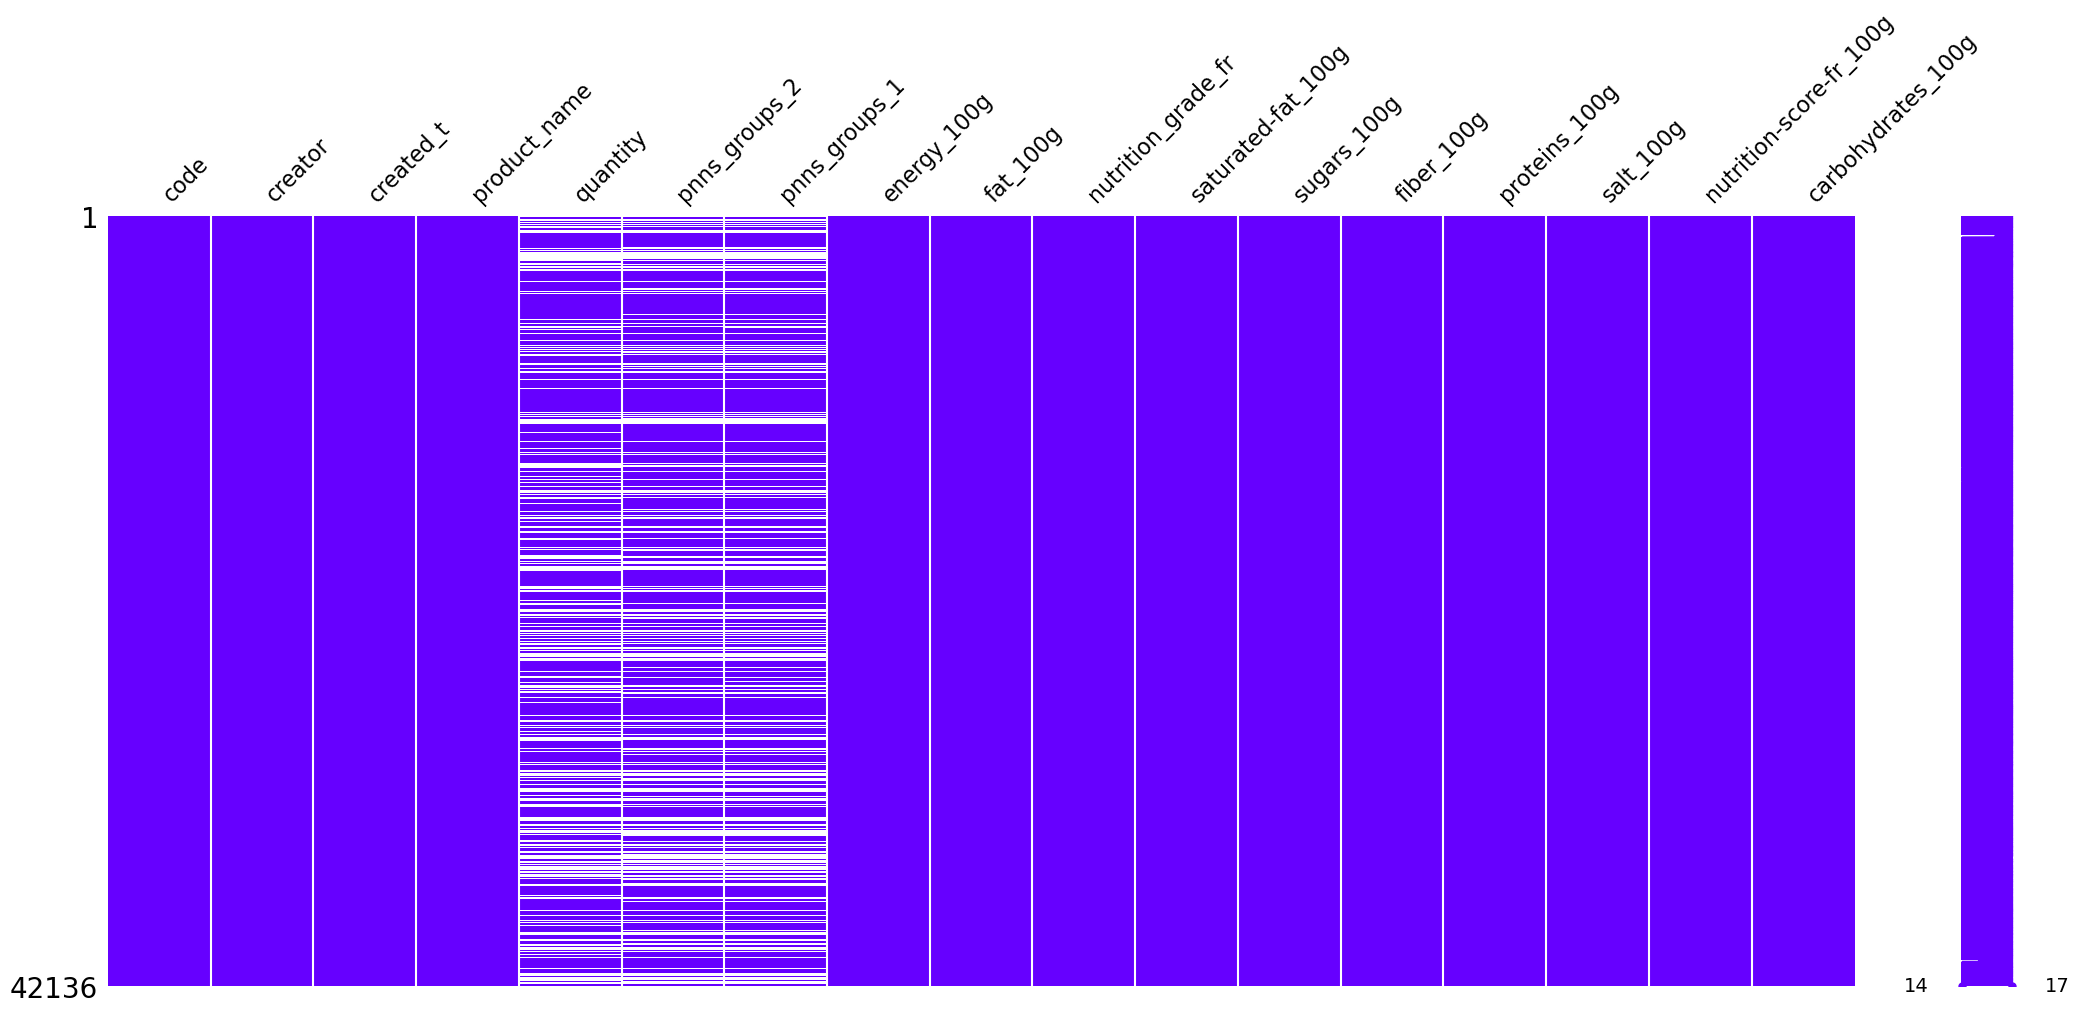

In [115]:
import missingno as msno
%matplotlib inline
msno.matrix(df,color=(0.4,0,1))

****
<div style="padding:20px;color:black;margin:0;font-size:200%;display:fill;border-radius:5px;background-color:#e9f1fc;overflow:hidden;font-weight:500">Conclusion Partie 1</div>   
<a class="anchor" id="Conclusion"></a> 

****

> Nous passons d'une base de données composées de 322 772 lignes et 169 colonnes    
=> 42 136 lignes et 17 colonnes.    
Il n'y a plus que 3 colonnes ayant des cellules vides. 

In [116]:
df.to_csv("df.csv",sep=";")